In [6]:
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


%matplotlib inline

In [2]:
train = pd.read_csv("sample_data/california_housing_train.csv")
test = pd.read_csv("sample_data/california_housing_test.csv")

train_features = train.copy()
train_output = train_features.pop("median_house_value")
test_features = test.copy()
test_output = test_features.pop("median_house_value")

In [4]:
# Part 1a: Linear Regression
# Use Keras to create a linear regression model with one output. Make sure to add a normalization layer:


# Create a Sequential model
linear_model = keras.Sequential()

# Add normalization layer
linear_model.add(layers.LayerNormalization(input_shape=(8,)))

# Add a single output layer for linear regression
linear_model.add(layers.Dense(1, activation='linear'))

# Compile the model
linear_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
linear_model.summary()
# Train the model on the *training* data set:

history = linear_model.fit(train_features, train_output, epochs=100, batch_size=32, validation_split=0.2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_1 (Lay  (None, 8)                 16        
 erNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25 (100.00 Byte)
Trainable params: 25 (100.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
425/425 [==============================] - 3s 3ms/step - loss: 51269644288.0000 - val_loss: 77041467392.0000
Epoch 2/100
425/425 [==============================] - 1s 3ms/step - loss: 51266150400.0000 - val_loss: 77035855872.0000
Epoch 3/100
425/425 [==============================] - 1s 3ms/step - loss: 51259981824.0000 - val_loss: 77

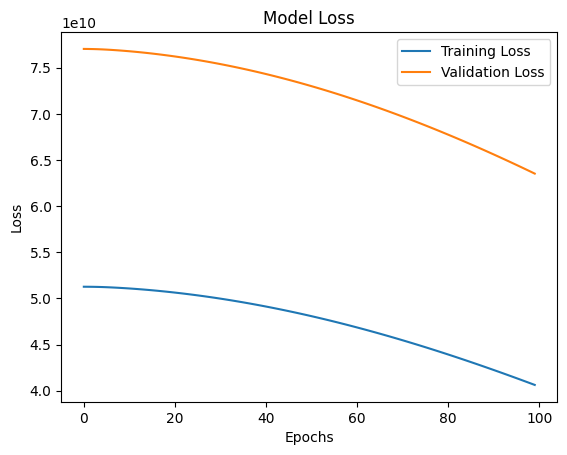

94/94 [==============================] - 0s 2ms/step
Mean Squared Error : 43963814893.48885
Mean Absolute Error: 176402.09767903647


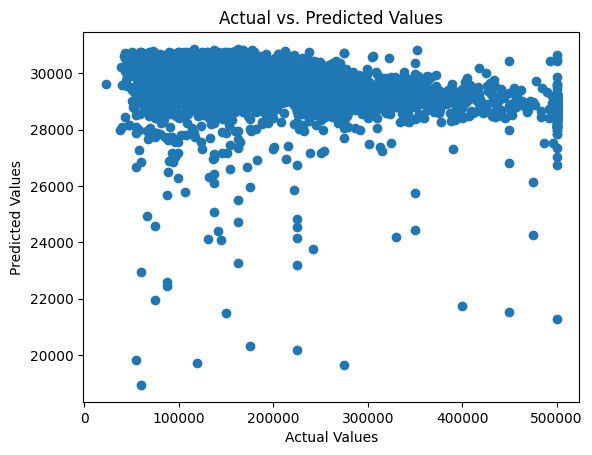

In [9]:
# Part 1b: Evaluation
# Plot history of model loss in training:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate and print mean squared error and mean absolute error for linear regression model on the *test* data set:
# Predict the output using the trained model
predictions = linear_model.predict(test_features)

# Calculate mean squared error and mean absolute error
linear_mse = mean_squared_error(test_output, predictions)
linear_mae = mean_absolute_error(test_output, predictions)

# linear_mse = ...
print(f"Mean Squared Error : {linear_mse}")

# linear_mae = ...
print(f"Mean Absolute Error: {linear_mae}")

# Graph the actual values against the predicted values:
plt.scatter(test_output, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [11]:
# Part 2a

# Use Keras to create a neural network model with multiple layers and one output. Make sure to add a normalization layer:

# Create a Sequential model
neural_model = keras.Sequential()

input_shape=8

# Add normalization layer
neural_model.add(layers.LayerNormalization(input_shape=(input_shape,)))  # Replace input_shape with the number of input features

# Add hidden layers
neural_model.add(layers.Dense(64, activation='relu'))
neural_model.add(layers.Dense(32, activation='relu'))

# Add output layer
neural_model.add(layers.Dense(1, activation='linear'))

# Compile the model
neural_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
neural_model.summary()

# Train the model on the *training* data set:
history = neural_model.fit(train_features, train_output, epochs=100, batch_size=32, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_normalization_3 (Lay  (None, 8)                 16        
 erNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                576       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2705 (10.57 KB)
Trainable params: 2705 (10.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
425/425 [==============================] - 3s 4ms/step - loss: 50515996672

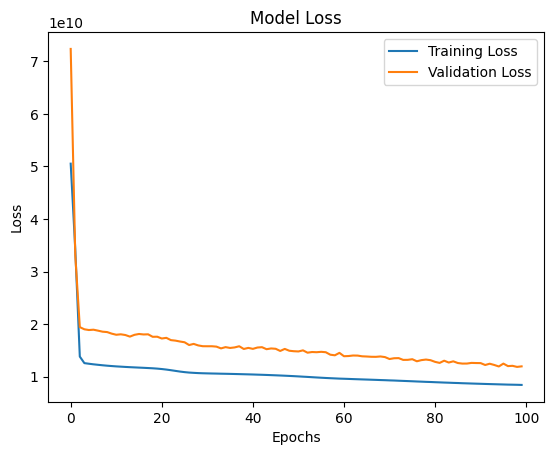

94/94 [==============================] - 0s 2ms/step
Mean Squared Error : 9090471528.910664
Mean Absolute Error: 74238.41199479166


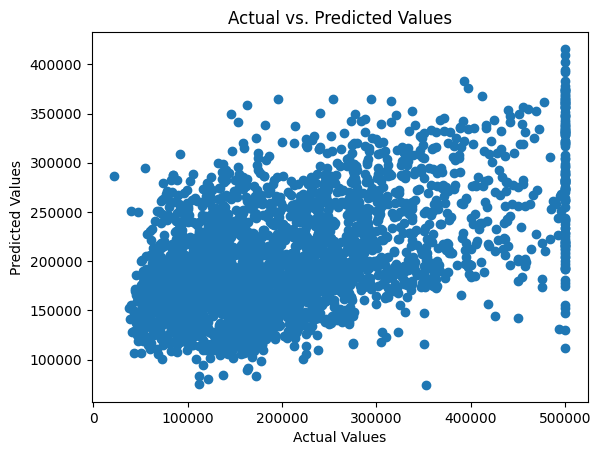

In [14]:
# Part 1b: Evaluation
# Plot history of model loss in training:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate and print mean squared error and mean absolute error for neural network model on the *test* data set:
# Predict the output using the trained model
predictions = neural_model.predict(test_features)

# Calculate mean squared error and mean absolute error
neural_mse = mean_squared_error(test_output, predictions)
neural_mae = mean_absolute_error(test_output, predictions)
# neural_mse = ...
print(f"Mean Squared Error : {neural_mse}")

# neural_mae = ...
print(f"Mean Absolute Error: {neural_mae}")

# Graph the actual values against the predicted values:
plt.scatter(test_output, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [ ]:
# Conclusion
# Compare the different models based on the metrics you calculated, and explain why one model might be more suitable for predicting house value.
# Consider aspects such as model complexity, training time and computational resources, and accuracy.

#  While I have not been provided with specific model comparison data or metrics, I can offer some general insights for comparing different types of models based on various factors:

# 1. Model Complexity: Linear regression models are relatively simple and interpretable, while neural network models can be more complex due to multiple layers and a larger number of parameters. In general, a more complex model may capture intricate patterns but might also be prone to overfitting.

# 2. Training Time and Computational Resources: Neural network models, especially with multiple layers, may require longer training times and significant computational resources compared to linear regression models. Larger datasets and complex architectures can further exacerbate this difference.

# 3. Accuracy: The accuracy of a model depends on multiple factors, including the complexity of the underlying patterns in the data and the model's ability to capture them. Neural networks, with their ability to learn intricate representations, might outperform linear regression models in certain complex tasks.

# Considering these aspects, if the dataset exhibits relatively simple relationships between features and the target variable, and computational resources are limited, a linear regression model might be more suitable due to its simplicity, interpretability, and potentially lower resource requirements. Conversely, if the dataset contains complex, non-linear relationships and resources allow for longer training times, a neural network model could be more suitable for capturing these intricate patterns and potentially achieving higher accuracy.

# However, the choice of the most suitable model ultimately depends on the specific characteristics of the dataset, the computational resources available, and the level of interpretability required for the task at hand. It is recommended to evaluate and compare models using specific metrics, such as mean squared error, mean absolute error, and potentially consider cross-validation or other techniques to ensure robust comparisons.